In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [51]:
pd.set_option('display.max_colwidth', None)

跟按国家年收入的前值数据基本一致，抄过来就行。一些批注在年收入分析中已写

In [52]:
survey_data = pd.read_csv("/input/stack-overflow-annual-developer-survey-2022/survey_results_public.csv")
schema_data = pd.read_csv("/input/stack-overflow-annual-developer-survey-2022/survey_results_schema.csv")

In [54]:
currency_data = pd.read_csv("/input/currencies-by-usd-with-gdp-and-gdp-per-capita/National Currencies Per US Dollar.csv", encoding="cp1252")

In [55]:
section1_df = schema_data.iloc[schema_data[schema_data["qname"] == "S1"].index[0]: schema_data[schema_data["qname"] == "S2"].index[0]]

In [56]:
section2_df = schema_data.iloc[schema_data[schema_data["qname"] == "S2"].index[0]: schema_data[schema_data["qname"] == "S3"].index[0]]

In [57]:
section3_df = schema_data.iloc[schema_data[schema_data["qname"] == "S3"].index[0]: schema_data[schema_data["qname"] == "S4"].index[0]]

In [58]:
section4_df = schema_data.iloc[schema_data[schema_data["qname"] == "S4"].index[0]: schema_data[schema_data["qname"] == "S5"].index[0]]

In [59]:
section5_df = schema_data.iloc[schema_data[schema_data["qname"] == "S5"].index[0]: schema_data[schema_data["qname"] == "S6"].index[0]]

In [60]:
section6_df = schema_data.iloc[schema_data[schema_data["qname"] == "S6"].index[0]: schema_data[schema_data["qname"] == "S7"].index[0]]


In [61]:
section7_df = schema_data.iloc[schema_data[schema_data["qname"] == "S7"].index[0]:]

In [62]:
first_array = np.array(survey_data.columns)

In [42]:
second_array = np.array(schema_data["qname"])

In [ ]:
para_data = currency_data[currency_data["Date"] == "3/17/2022"][["Currency Code", "Currency Name", "Exchange Rate"]]

In [80]:
para_data = para_data.drop_duplicates(subset=["Currency Code"])

In [81]:
null_values = para_data[para_data["Exchange Rate"].isna()]["Currency Code"].index

In [ ]:
para_data.drop(null_values, inplace=True)

In [86]:
new_columns = {"Currency Code": ["CZK", "HKD"], "Currency Name": ["Czech Republic Koruna", "Hong Kong Dollar"], "Exchange Rate": [0.0449, 0.1279]}

new_df = pd.DataFrame(new_columns)
para_data = pd.concat([para_data, new_df], ignore_index=True)

In [87]:
survey_data["Currency"] = survey_data["Currency"].str[:3]

In [ ]:
survey_data["Currency"]

In [89]:
merged_data = pd.merge(survey_data, para_data, left_on="Currency", right_on="Currency Code", how="outer", sort=False)

In [94]:
real_data = merged_data[merged_data["ConvertedToDollar"] < 1000000.000]

In [97]:
real_data.drop(real_data[real_data["DevType"].str.count(";") > 6].index, axis=0, inplace=True)

In [98]:
real_data.drop(real_data[real_data["DevType"].isna()].index, inplace=True)

In [ ]:
grouped_columns = np.array(real_data.iloc[:, np.where(real_data.columns.str.startswith("DevType") == True)[0][1:]].columns)
grouped_columns = np.delete(grouped_columns, -8)
grouped_columns = np.append(grouped_columns, ["ConvertedToDollar"])
grouped_columns = np.append(grouped_columns, ["Country", "ConvertedToDollar"])

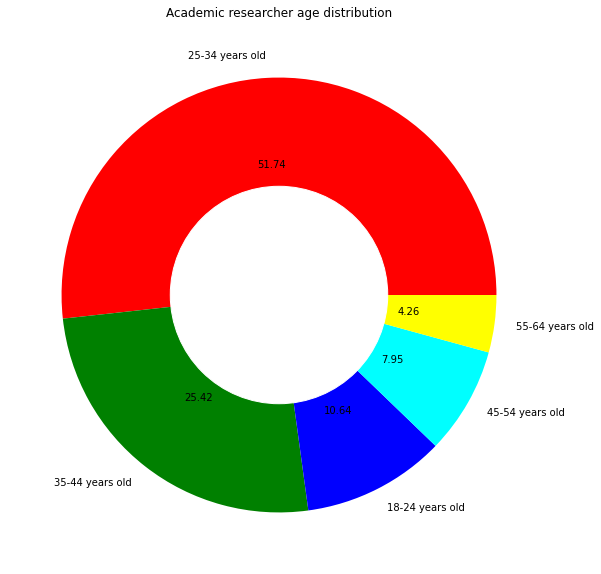

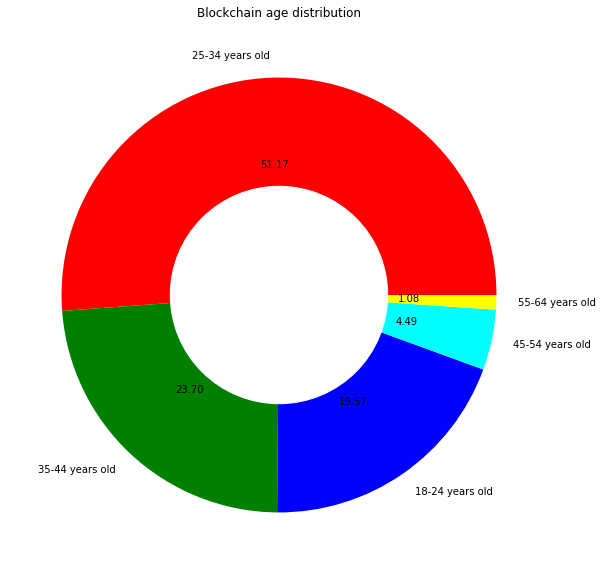

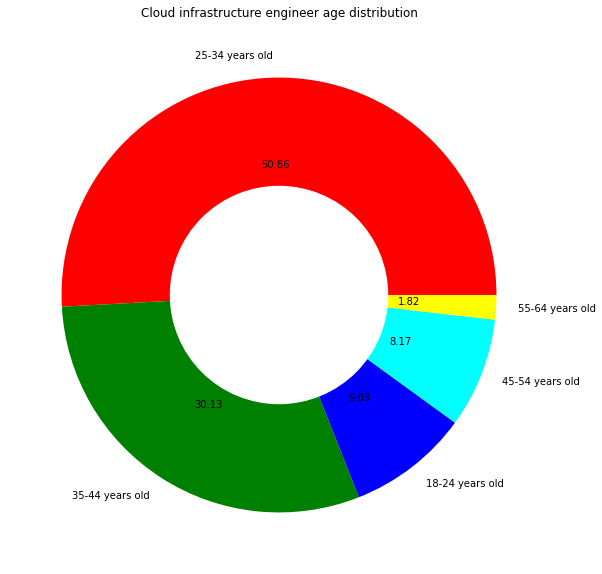

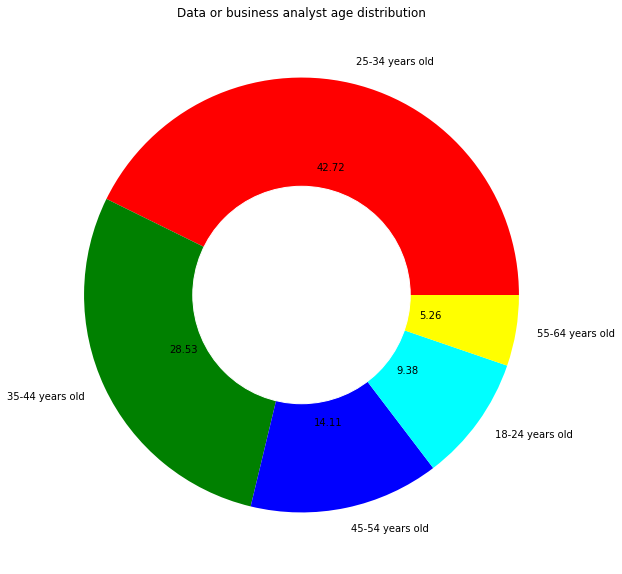

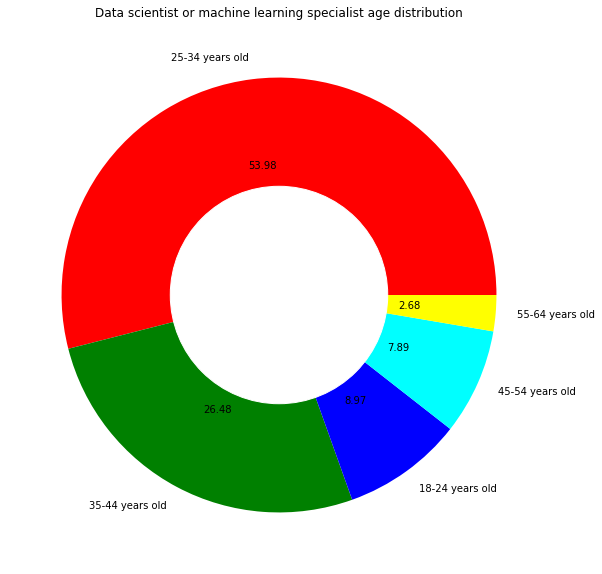

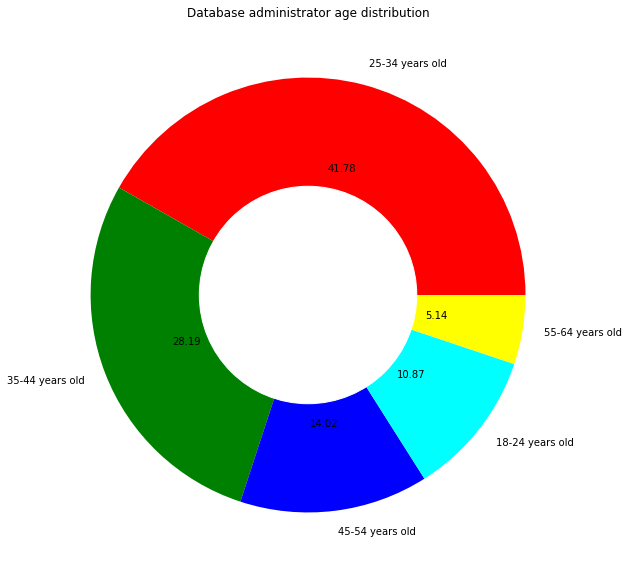

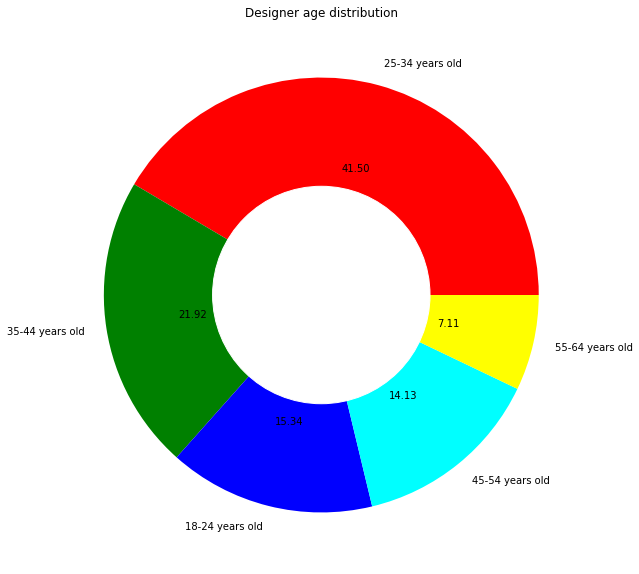

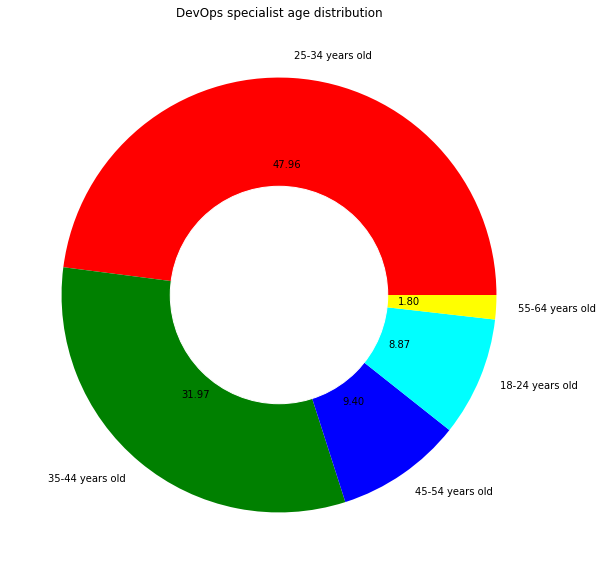

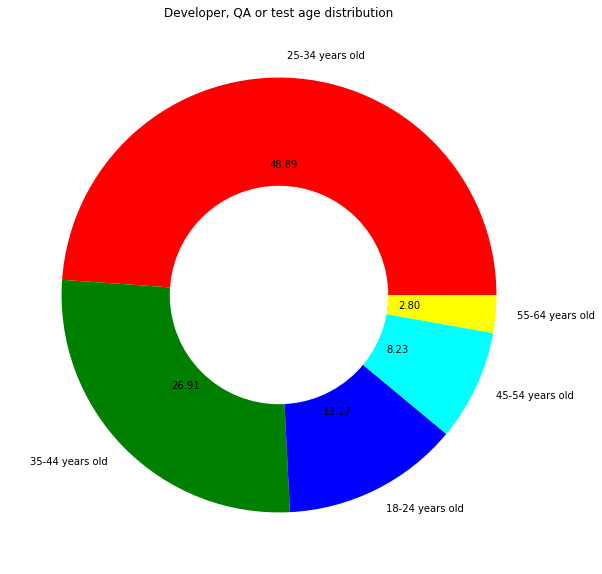

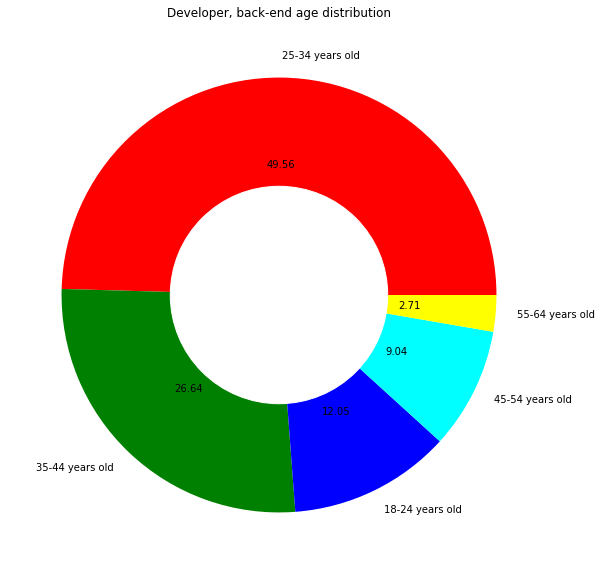

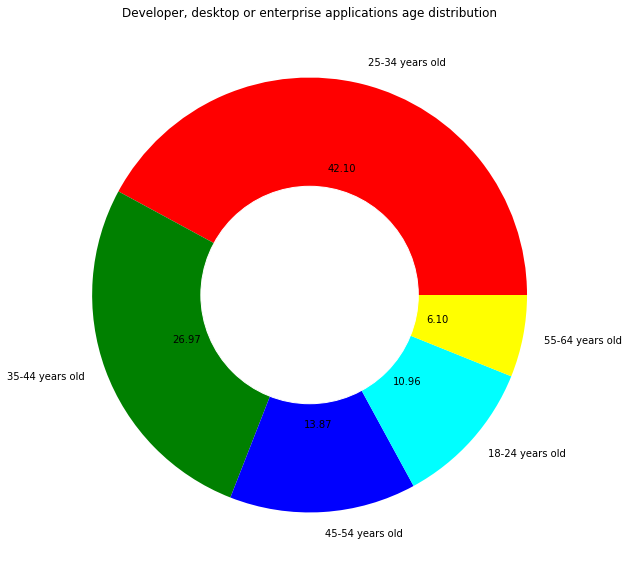

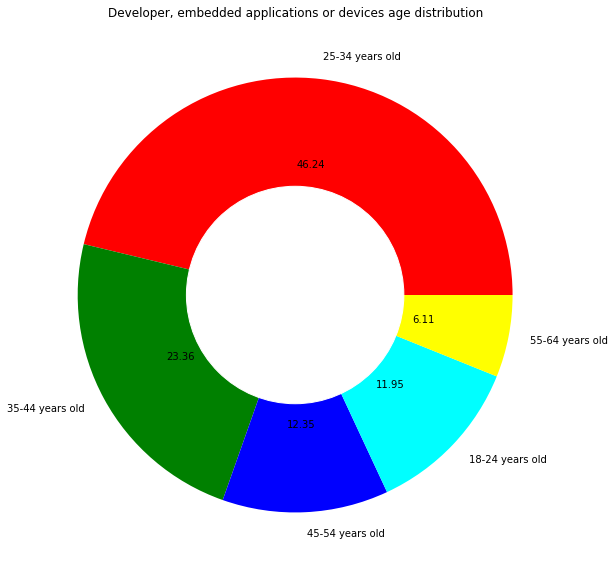

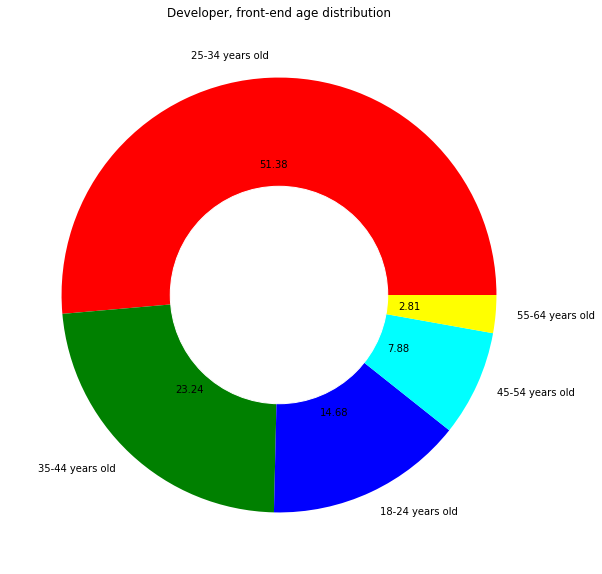

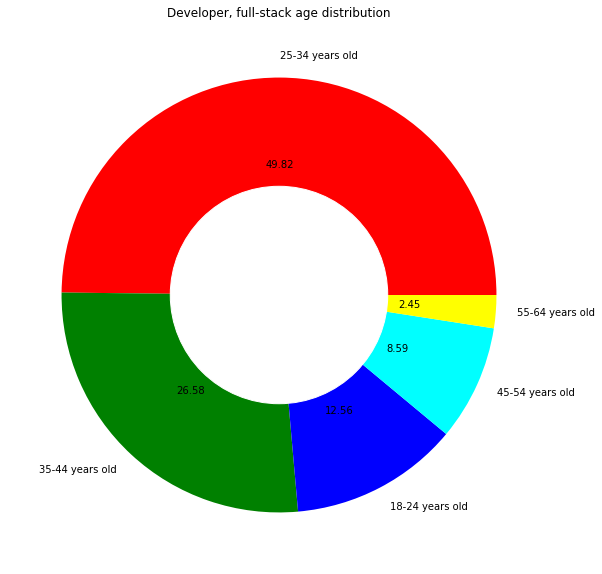

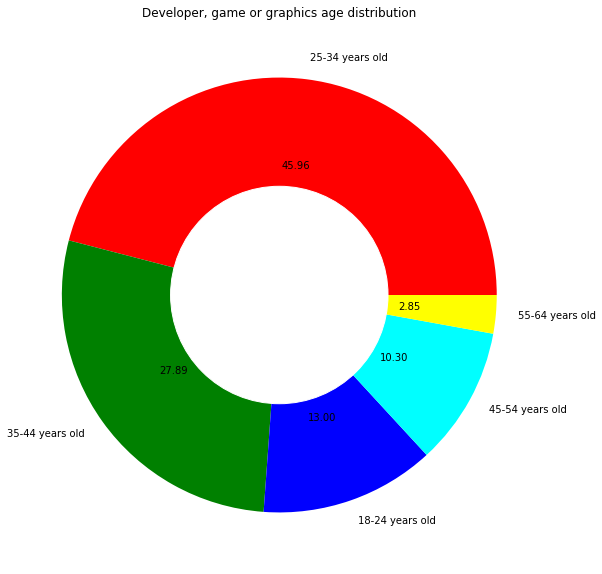

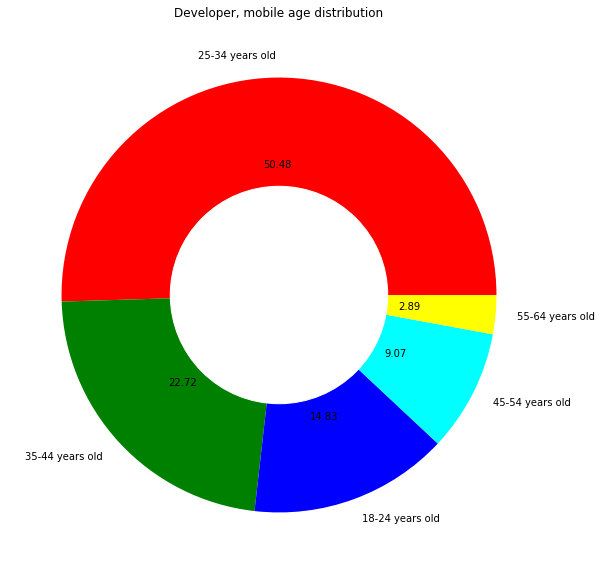

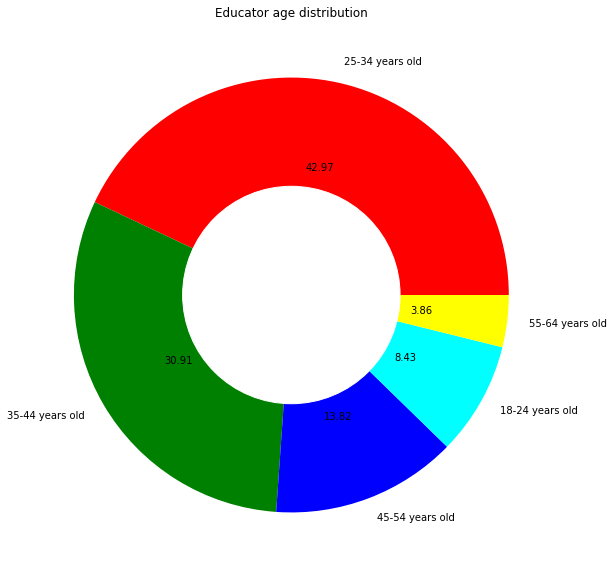

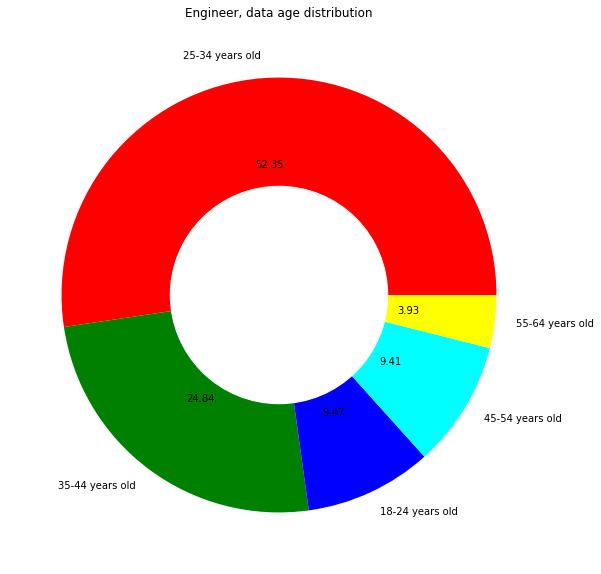

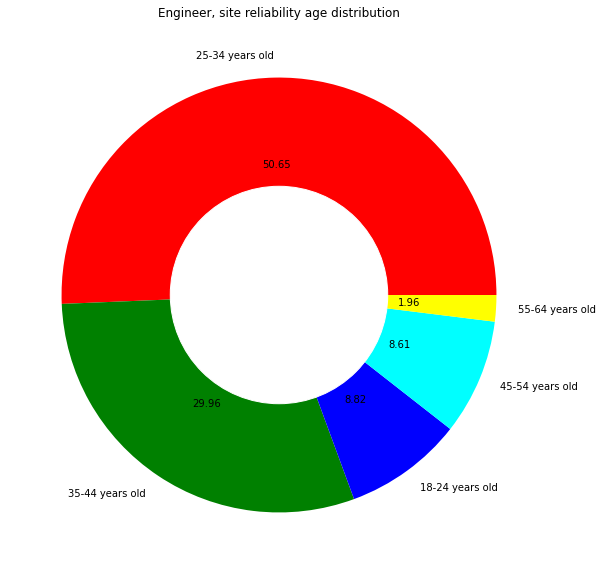

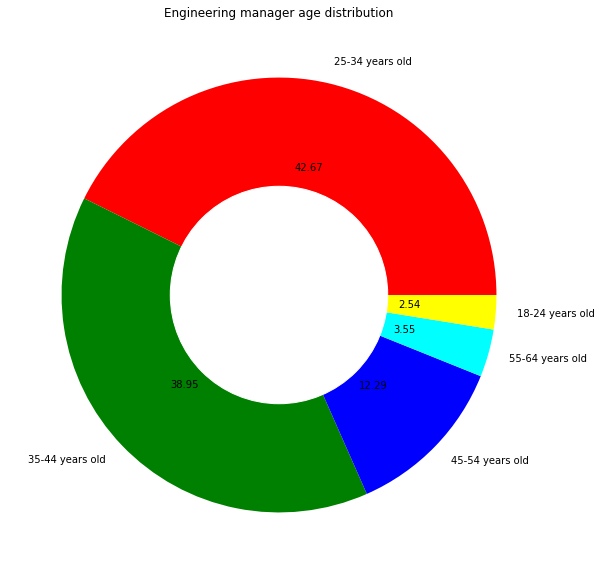

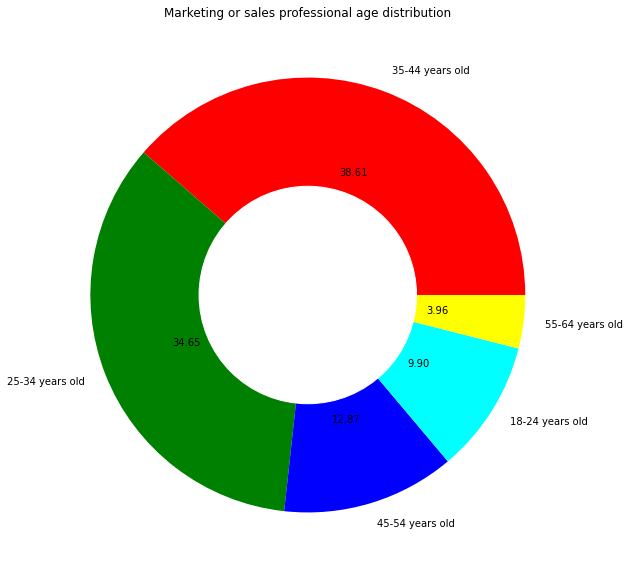

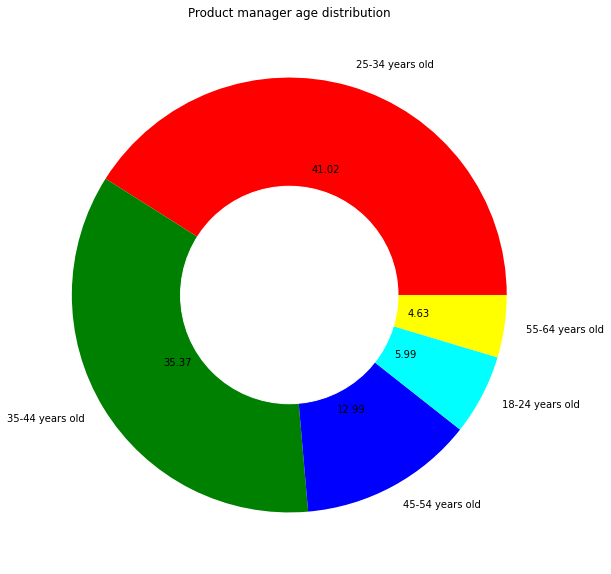

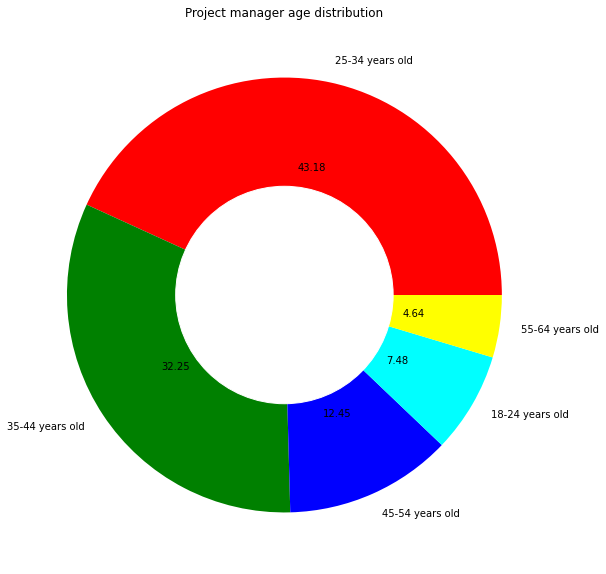

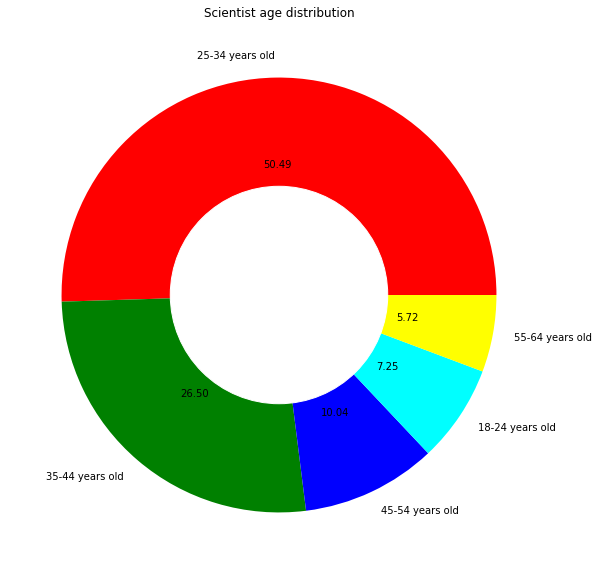

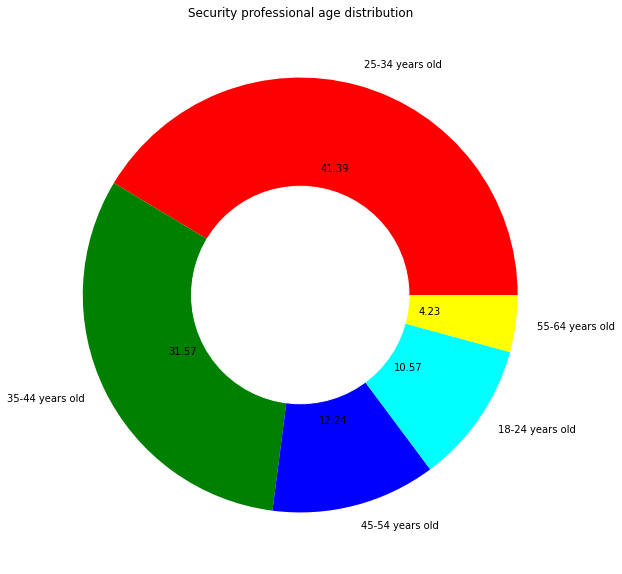

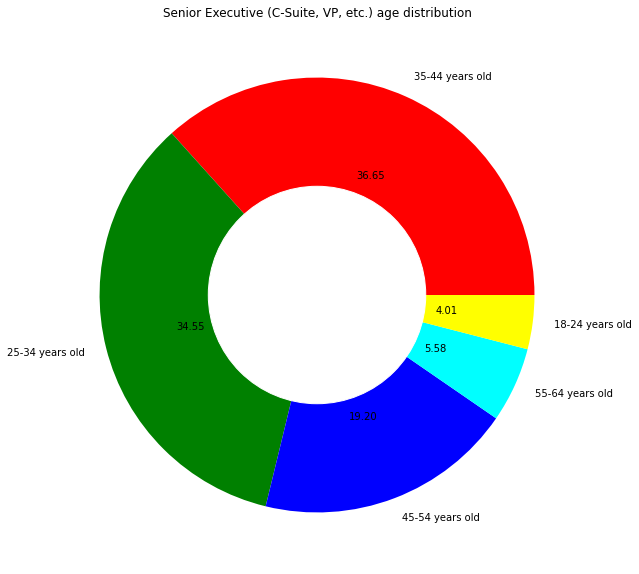

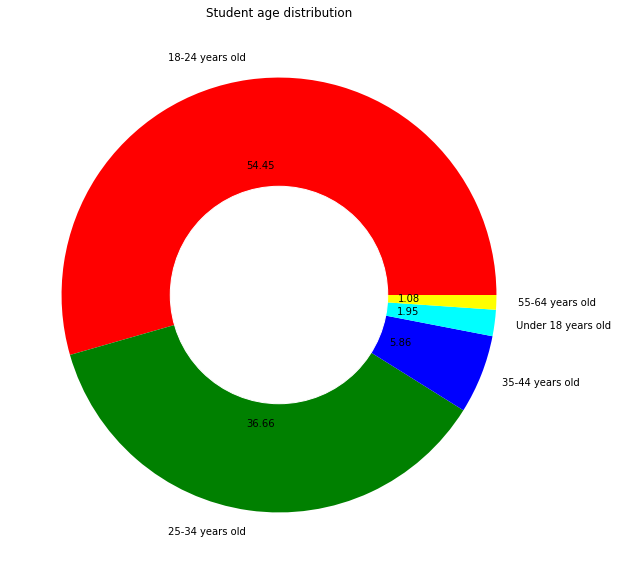

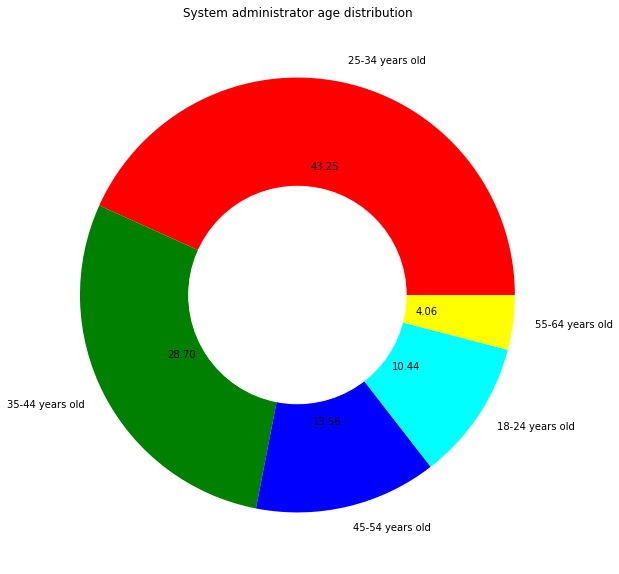

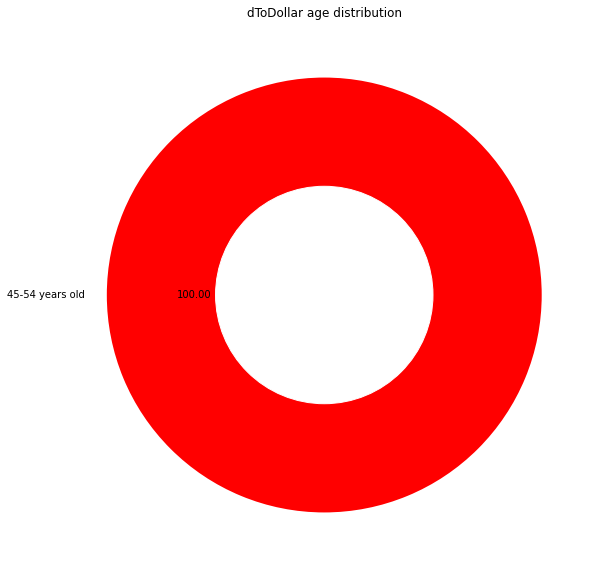

In [103]:
for i in grouped_columns:
    plt.figure(figsize=(15,10))
    circle = plt.Circle((0,0),0.5,color = "white")
    plt.pie(np.array(real_data[real_data[i] == 1]["Age"].value_counts(normalize=True).values[:5]), labels = np.array(real_data[real_data[i] == 1]["Age"].value_counts(normalize=True).index[:5]), colors = ["red","green","blue","cyan", "yellow"], autopct='%.2f')
    p = plt.gcf()
    p.gca().add_artist(circle)
    plt.title("{} age distribution".format(i[8:]))
    plt.show()